#QUESTINS
Implement a Gaussian Processes Regress from the first principle to find functions that model the relationship between the following.

x = [0, 0.1, 2, 4] & y = [4, 0.9, 3.6, 5]

In [ ]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [ ]:
 #x and y values
x = [0, 0.1, 2, 4]
y = [4, 0.9, 3.6, 5]

Text(0, 0.5, 'y-values')

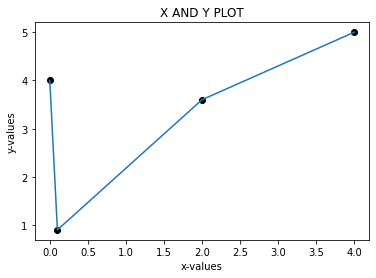

In [ ]:

plt.plot(x,y)
plt.scatter(x,y, color='black')
plt.title('X AND Y PLOT')
plt.xlabel('x-values')
plt.ylabel('y-values')

Kernel function

In [ ]:
x_prior = np.linspace(-5,5,120)
#Squared exponential kernel
def KernelS(X,L=0.5):
    return  np.array([np.exp(-(X-xi)**2 / (2*L**2)) for xi in X])

#priors

In [ ]:
Kernel_prior = KernelS(x_prior)
mu_prior = np.zeros_like(x_prior)
P_prior = np.random.multivariate_normal(mu_prior, Kernel_prior, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


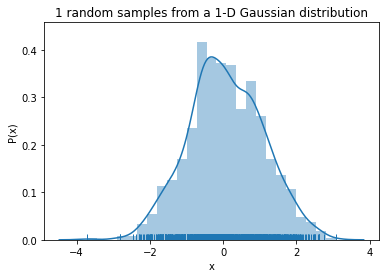

In [ ]:
# Plot 1-D gaussian
n = 1         
m= 1000        
f_random = np.random.normal(size=(n, m)) 

for i in range(n):
    sns.distplot(f_random[i], hist=True, rug=True)

plt.title('1 random samples from a 1-D Gaussian distribution')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

#joint Distributions

In [ ]:
x_joint = np.r_[x, x_prior]
Kernel_joint = KernelS(x_joint)

In [ ]:
n = len(x)
K_1 = Kernel_joint[:n,:n]
K_2 = Kernel_joint[n:,:n]
K_3 = Kernel_joint[n:,n:]

In [ ]:
mu_pos = K_2@np.linalg.inv(K_1)@y
K_pos = K_3 - K_2@np.linalg.inv(K_1)@K_2.T
P_pos = np.random.multivariate_normal(mu_pos, K_pos, 10)

# Inference of  Gaussian Processes Regression

in

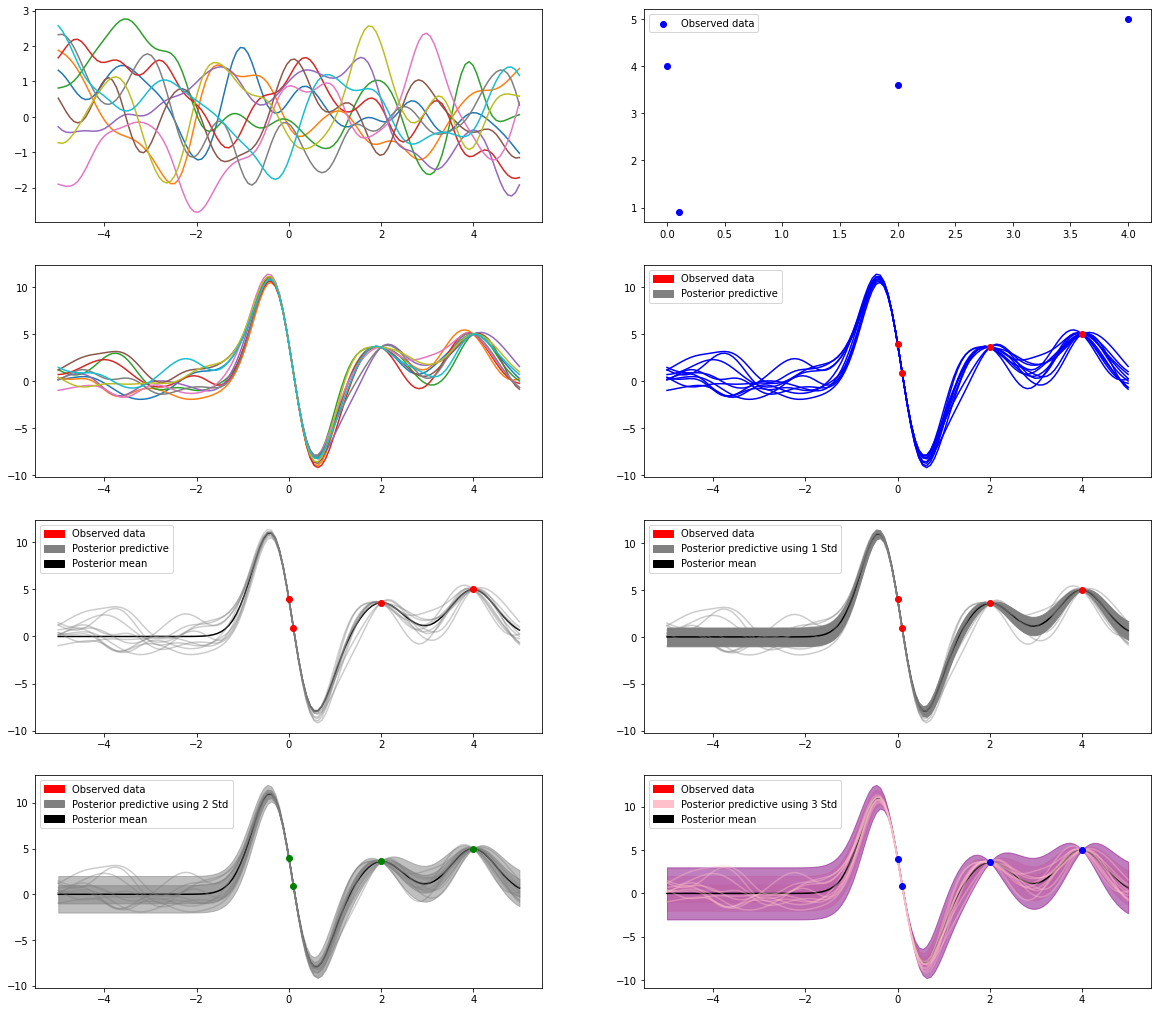

In [ ]:
_,ax = plt.subplots(4,2, figsize=(20,18));
ax[0,0].plot(x_prior, P_prior.T);
ax[0,1].scatter(x, y, color='b', label = 'Observed data');
ax[0,1].legend();
ax[1,0].plot(x_prior, P_pos.T);


ax[1,1].plot(x_prior, P_pos.T, color='blue');
ax[1,1].scatter(x,y, zorder=3, color='r');
observed_patch = mpatches.Patch(color='r', label='Observed data')
posterior_patch = mpatches.Patch(color='grey', label='Posterior predictive')
ax[1,1].legend(handles=[observed_patch, posterior_patch], loc = 'upper left');


ax[2,0].plot(x_prior, mu_pos, color='k');
ax[2,0].plot(x_prior, P_pos.T, color='grey', alpha=0.4);
ax[2,0].scatter(x,y, zorder=3, color='r');
postmean_patch = mpatches.Patch(color='k', label='Posterior mean')
ax[2,0].legend(handles=[observed_patch, posterior_patch, postmean_patch], loc = 'upper left');

ax[2,1].fill_between(x_prior, mu_pos + np.sqrt(np.diag(K_pos)),
                    mu_pos - np.sqrt(np.diag(K_pos)), color='grey')
ax[2,1].plot(x_prior, mu_pos, color='k');
ax[2,1].plot(x_prior, P_pos.T, color='grey', alpha=0.4);
ax[2,1].scatter(x,y, zorder=3, color='r');
posterior1std_patch = mpatches.Patch(color='grey', label='Posterior predictive using 1 Std')
ax[2,1].legend(handles=[observed_patch, posterior1std_patch, postmean_patch], loc = 'upper left');

ax[3,0].fill_between(x_prior, mu_pos + np.sqrt(np.diag(K_pos)),
                    mu_pos - np.sqrt(np.diag(K_pos)), color='grey', alpha=0.5)
ax[3,0].fill_between(x_prior, mu_pos + 2*np.sqrt(np.diag(K_pos)),
                    mu_pos - 2*np.sqrt(np.diag(K_pos)), color='grey', alpha=0.5)
ax[3,0].plot(x_prior, mu_pos, color='k');
ax[3,0].plot(x_prior, P_pos.T, color='grey', alpha=0.4);
ax[3,0].scatter(x,y, zorder=3, color='g');
posterior2std_patch = mpatches.Patch(color='grey', label='Posterior predictive using 2 Std')
ax[3,0].legend(handles=[observed_patch, posterior2std_patch, postmean_patch], loc = 'upper left');

ax[3,1].fill_between(x_prior, mu_pos + np.sqrt(np.diag(K_pos)),
                    mu_pos - np.sqrt(np.diag(K_pos)), color='pink', alpha=0.5)
ax[3,1].fill_between(x_prior, mu_pos + 2*np.sqrt(np.diag(K_pos)),
                    mu_pos - 2*np.sqrt(np.diag(K_pos)), color='pink', alpha=0.5)
ax[3,1].fill_between(x_prior, mu_pos + 3*np.sqrt(np.diag(K_pos)),
                    mu_pos - 3*np.sqrt(np.diag(K_pos)), color='purple', alpha=0.5)
ax[3,1].plot(x_prior, mu_pos, color='k');
ax[3,1].plot(x_prior, P_pos.T, color='pink', alpha=0.4);
ax[3,1].scatter(x,y, zorder=3, color='b');
posterior3std_patch = mpatches.Patch(color='pink', label='Posterior predictive using 3 Std')
ax[3,1].legend(handles=[observed_patch, posterior3std_patch, postmean_patch], loc = 'upper left');

we can see that there is some level of certainity where there are green,red and blue points